# Convulutional AutoEncoders for Image Classifcation

## Importing Libraries

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Reshape    # Here UpSampling2D is the opposite of MaxPooling2D. Reshape it used to convert flattened img to matrix again 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__



'2.16.1'

## Loading the Dataset

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

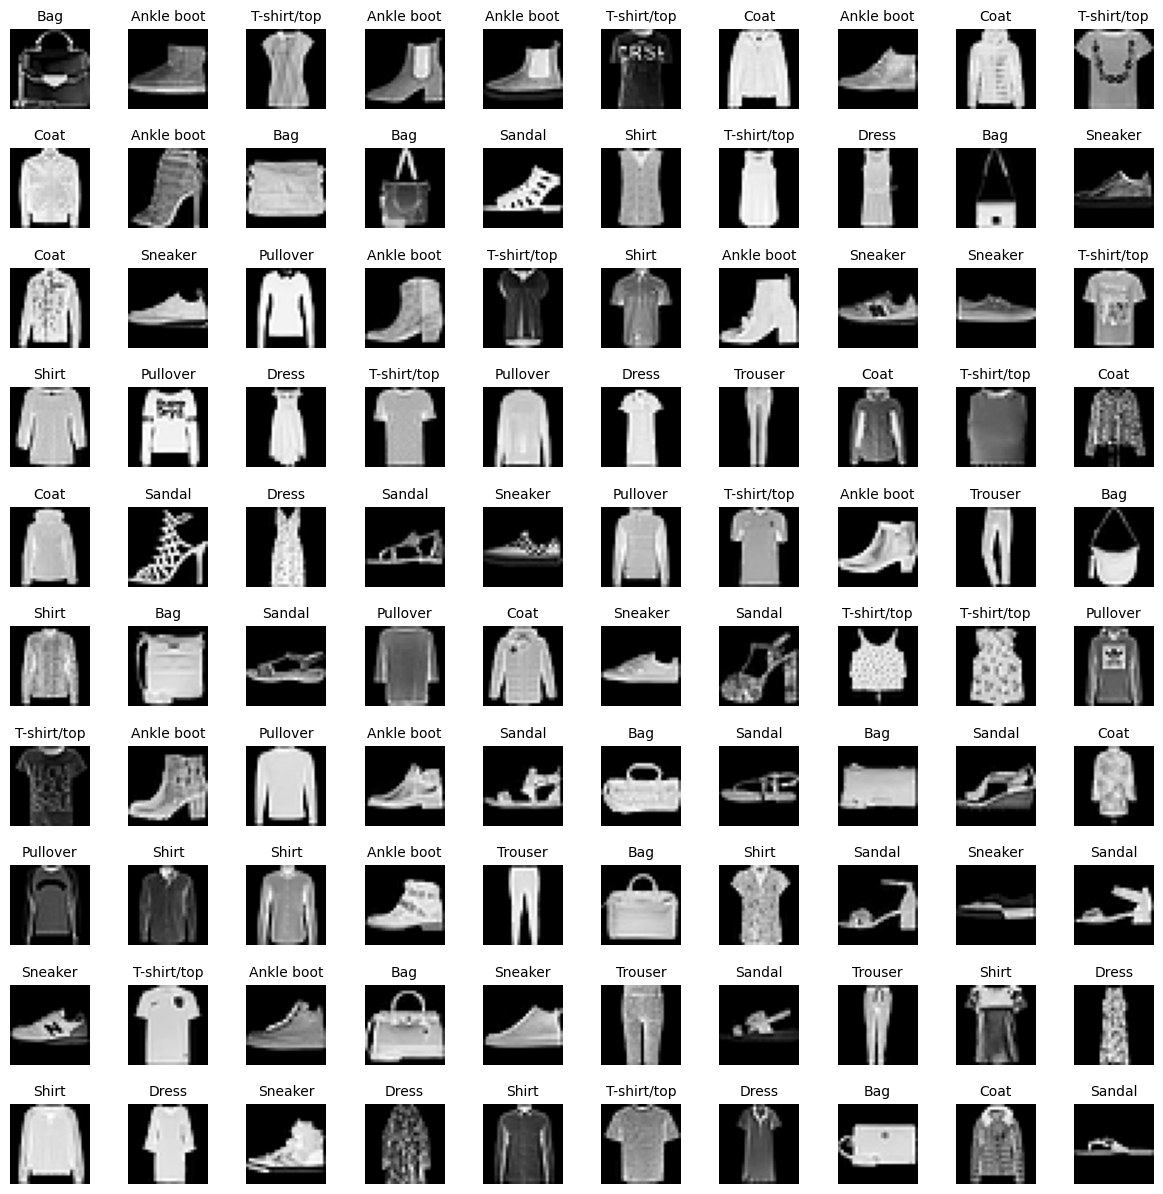

In [10]:
width, height = 10, 10
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fig, axis = plt.subplots(height, width, figsize=(15, 15))   
# print(axis.shape) # represent position of each subplot. We want it in a Vector form
axis = axis.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 59999)
    axis[i].imshow(X_train[index], cmap='gray')
    axis[i].set_title(classes[y_train[index]], fontsize=10)  
    axis[i].axis('off') 
plt.subplots_adjust(hspace=0.5)


## Preprocessing the Image

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In Linear AutoEncoder, we need to pass each pixel in the form of a vector to each neuron of the autoencoder. But in convolutional autoencoders, we can simply pass the image in grayscale\rgb format. Since above shape does not have the number for grayscale, so we reshape it

In [14]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Building and Training the Convolutional AutoEncoder

In [94]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(2, 2)))
autoencoder.add(Flatten()) # Encoded Image of 128 pixels in form of vector

# Decoder
autoencoder.add(Reshape((4, 4, 8)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='valid'))
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

autoencoder.summary() 

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_199 (Conv2D)             │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_200 (Conv2D)             │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_201 (Conv2D)             │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_43 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_26 (Reshape)            │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_202 (Conv2D)             │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_49 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_203 (Conv2D)             │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_50 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_204 (Conv2D)             │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_51 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_205 (Conv2D)             │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# My Structure
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=24, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(Flatten()) # Encoded Image of 128 pixels in form of vector

# Decoder
autoencoder.add(Reshape((7, 7, 8)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=24, kernel_size=(3, 3), activation='relu', padding='same'))

autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

autoencoder.summary() 

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_259 (Conv2D)             │ (None, 26, 26, 24)     │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 13, 13, 24)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_260 (Conv2D)             │ (None, 13, 13, 16)     │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 7, 7, 16)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_261 (Conv2D)             │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_54 (Flatten)            │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_36 (Reshape)            │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_262 (Conv2D)             │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_68 (UpSampling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_263 (Conv2D)             │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_69 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_264 (Conv2D)             │ (None, 28, 28, 24)     │         3,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_265 (Conv2D)             │ (None, 28, 28, 1)      │           217 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,321 (40.32 KB)

 Trainable params: 10,321 (40.32 KB)

 Non-trainable params: 0 (0.00 B)

Why Use Sigmoid and Binary Crossentropy?

Sigmoid Activation:
    The sigmoid activation function ensures that the output values are within the range [0,1][0,1], making them interpretable as probabilities.
    
Binary Crossentropy Loss:
    The binary_crossentropy loss function calculates the difference between the predicted probability (output of the sigmoid function) and the true target value (normalized pixel value).
    It is particularly effective for scenarios where the output can be interpreted as a probability, and it is sensitive to small differences in predicted values, making it suitable for image reconstruction tasks.

In [107]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5018 - loss: 0.3219
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5086 - loss: 0.2707
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5094 - loss: 0.2659
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5101 - loss: 0.2632
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5096 - loss: 0.2618
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5098 - loss: 0.2604
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5096 - loss: 0.2598
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5104 - loss: 0.2584
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5090 - loss: 0.2590
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5101 - loss: 0.2577
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5094 - loss: 0.2576
Epoch 12/50
1875/1875 ━━━━━━━━

In [111]:
# Encoder
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('flatten_54').output)


In [112]:
encoder.summary()   

Model: "functional_542"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_56 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_259 (Conv2D)             │ (None, 26, 26, 24)     │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 13, 13, 24)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_260 (Conv2D)             │ (None, 13, 13, 16)     │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 7, 7, 16)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_261 (Conv2D)             │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_54 (Flatten)            │ (None, 392)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,872 (19.03 KB)

 Trainable params: 4,872 (19.03 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
coded_test_images = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


In [114]:
coded_test_images.shape

(10000, 392)

In [115]:
coded_test_images[0]

array([0.16451925, 0.5398861 , 0.7569692 , 0.22711149, 0.39663154,
       0.12046862, 0.1828179 , 0.28986695, 0.19046591, 0.49151754,
       0.43873122, 0.33103442, 0.47270575, 0.        , 0.22616819,
       0.2815606 , 0.19995394, 0.46233347, 0.46933854, 0.34394163,
       0.43257436, 0.        , 0.22525638, 0.3005097 , 0.19989559,
       0.46838298, 0.448152  , 0.33908904, 0.44689187, 0.        ,
       0.22915936, 0.2893734 , 0.22776324, 0.49321622, 0.43674323,
       0.31598318, 0.43823296, 0.        , 0.20676163, 0.32286292,
       0.2504847 , 0.48628825, 0.47981536, 0.32934654, 0.45592484,
       0.        , 0.20140398, 0.31074554, 0.3209862 , 0.48186648,
       0.58097947, 0.43996233, 0.31279883, 0.        , 0.21097495,
       0.2799711 , 0.1621885 , 0.62839305, 0.69756943, 0.2491075 ,
       0.373568  , 0.18747538, 0.03555112, 0.38314205, 0.15230894,
       0.57904804, 0.40499544, 0.30765295, 0.4059693 , 0.1215723 ,
       0.09792726, 0.27818322, 0.19493338, 0.6566421 , 0.42223

In [116]:
X_test[0].shape

(28, 28, 1)

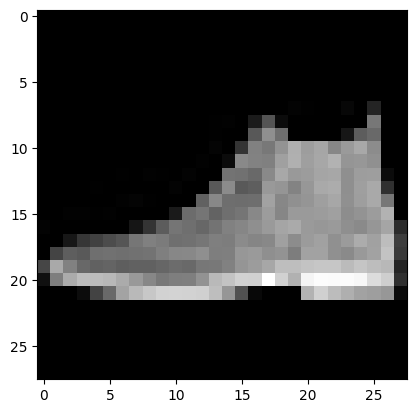

In [117]:
plt.imshow(X_test[0], cmap='gray');

In [120]:
coded_test_images[0].reshape(28, 14, 1).shape

(28, 14, 1)

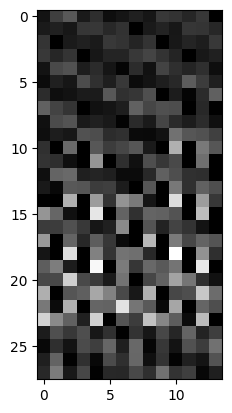

In [121]:
plt.imshow(coded_test_images[0].reshape(28, 14, 1), cmap='gray');

In [122]:
decoded_test_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [123]:
decoded_test_images.shape

(10000, 28, 28, 1)

In [124]:
decoded_test_images[0].shape

(28, 28, 1)

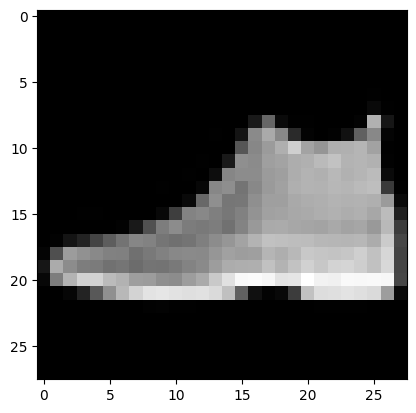

In [125]:
plt.imshow(decoded_test_images[0], cmap='gray');

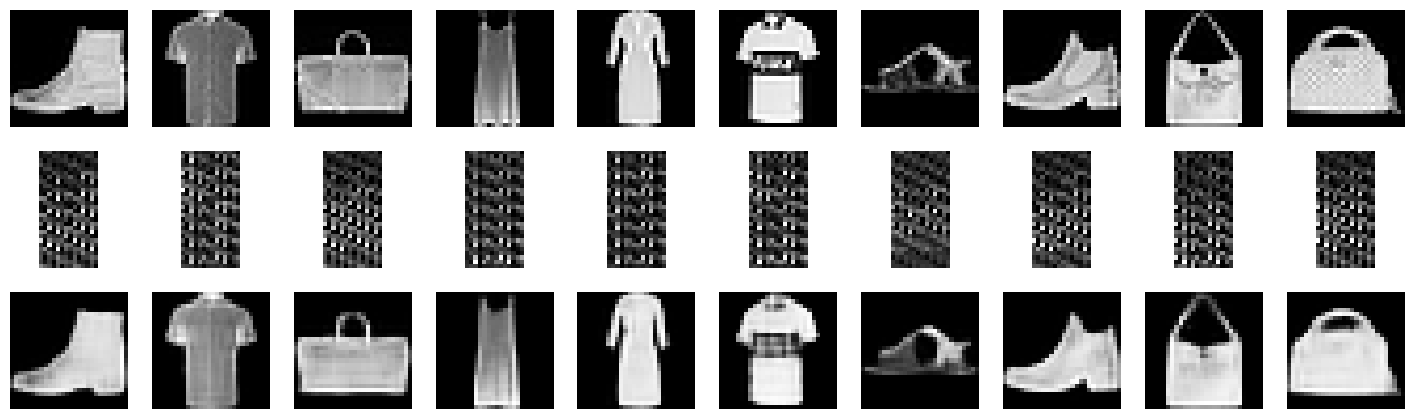

In [126]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size=n_images)

plt.figure(figsize=(18, 18))

for i, image_index in enumerate(test_images):
    # Original Image
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_test[image_index], cmap='gray')
    plt.axis('off')

    # Coded Image
    ax = plt.subplot(10, 10, i + 1 + n_images)
    plt.imshow(coded_test_images[image_index].reshape(28, 14), cmap='gray')
    plt.axis('off')

    # Coded Image]
    ax = plt.subplot(10, 10, i + 1 + n_images * 2)
    plt.imshow(decoded_test_images[image_index], cmap='gray')
    plt.axis('off')
